In [58]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import chi2_contingency
from itertools import combinations


1. State the Null Hypothesis and the Alternative Hypothesis.
Null Hypothesis - H0 - Version A attracts more CTR Alternative Hypothesis - Ha - Version A is not the most attractive version and does not provide the highest CTR

2.  Select an appropriate significance level alpha (
).
It was decided that a relatively high alpha was acceptable in this case

In [ ]:
alpha = 0.05

In [17]:
# Load datasets
eniac_a = pd.read_csv('eniac_a.csv')
eniac_b = pd.read_csv('eniac_b.csv')
eniac_c = pd.read_csv('eniac_c.csv')
eniac_d = pd.read_csv('eniac_d.csv')


In [19]:
a_df = eniac_a.copy()
b_df = eniac_b.copy()
c_df= eniac_c.copy()
d_df= eniac_d.copy()

How many clicks did each element get?

In [20]:
a_df.head(3)


,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,269,True,Homepage Version A - white SHOP NOW • http...
1,25,div,mySidebar,309,True,created 2021-09-14 • 14 days 0 hours 34 mi...
2,4,a,Mac,279,True,NaN


In [21]:
b_df.head(3)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,236,True,Homepage Version B - red SHOP NOW • https:...
1,25,div,mySidebar,304,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,268,True,NaN


In [22]:
c_df.head(3)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,288,True,Homepage Version C - white SEE DEALS • htt...
1,25,div,mySidebar,283,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,262,True,NaN


In [23]:
d_df.head(3)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,285,True,Homepage Version D - red SEE DEALS • https...
1,25,div,mySidebar,305,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,274,True,NaN


The important pieces of information (clicks on each element of interest & visits on each page) are scattered around. Let's collect them. Importing the csv's

In [24]:
eniac_a_clicks = a_df.loc[a_df["Name"]=="SHOP NOW", "No. clicks"].iloc[0]
eniac_b_clicks = b_df.loc[b_df["Name"]=="SHOP NOW", "No. clicks"].iloc[0]
eniac_c_clicks = c_df.loc[c_df["Name"]=="SEE DEALS", "No. clicks"].iloc[0]
eniac_d_clicks = d_df.loc[d_df["Name"]=="SEE DEALS", "No. clicks"].iloc[0]

In [25]:
a_df.iloc[1, -1]

'created 2021-09-14   •   14 days 0 hours 34 mins   •   25326 visits, 23174 clicks'

In [26]:
eniac_a_clicks

512

In [27]:
b_df.iloc[1, -1]

'created 2021-10-27   •   14 days 0 hours 34 mins   •   24747 visits, 22407 clicks'

In [28]:
eniac_b_clicks

281

In [29]:
c_df.iloc[1, -1]

'created 2021-10-27   •   14 days 0 hours 34 mins   •   24876 visits, 23031 clicks'

In [30]:
eniac_c_clicks

527

In [31]:
d_df.iloc[1, -1]

'created 2021-10-27   •   14 days 0 hours 34 mins   •   25233 visits, 22743 clicks'

In [32]:
eniac_d_clicks

193

How many visits did each page get (they are in the last column of the second row, we read them manually)?

In [36]:
eniac_a_visits = 25326
eniac_b_visits = 24747
eniac_c_visits = 24876
eniac_d_visits = 25233

From the above information, we can calculate the number of visitors who didn't click on the button

In [37]:
eniac_a_no_click = eniac_a_visits - eniac_a_clicks
eniac_b_no_click = eniac_b_visits - eniac_b_clicks
eniac_c_no_click = eniac_c_visits - eniac_c_clicks
eniac_d_no_click = eniac_d_visits - eniac_d_clicks

Now we can make a contingency table that shows the clicks and no clicks for each version of the website

In [38]:
clicks = [eniac_a_clicks, eniac_b_clicks, eniac_c_clicks, eniac_d_clicks]
noclicks = [eniac_a_no_click, eniac_b_no_click, eniac_c_no_click, eniac_d_no_click]

observed_results = pd.DataFrame(data = [clicks, noclicks],
                                columns = ["Version_A", "Version_B", "Version_C", "Version_D"],
                                index = ["Click", "No-click"])

observed_results

,Version_A,Version_B,Version_C,Version_D
Click,512,281,527,193
No-click,24814,24466,24349,25040


In [42]:
chisq, pvalue, df, expected = chi2_contingency(observed_results) #, the code is testing whether the version of the website (A, B, C, or D) and the user's behavior (click or no click) are related or independent.


In [43]:
chisq

224.01877488058412

In [44]:
pvalue

2.7161216607868712e-48

In [45]:
expected

array([[  382.48625502,   373.74189974,   375.69012397,   381.08172127],
       [24943.51374498, 24373.25810026, 24500.30987603, 24851.91827873]])

In [46]:
if pvalue > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is smaller than alpha.


In [47]:
if pvalue > alpha:
  print("Do not reject the null hypothesis")
else:
  print("Reject the null hypothesis")

Reject the null hypothesis


Since the p-value is (much) smaller than alpha, we reject the Null Hypothesis.

Remember: If p is low, the Null must go!

This means that at least one of the four different versions performed significantly better or worse than the others.

In [49]:
# calculate the click through rate for each version
ctr_a = observed_results.loc["Click", "Version_A"] / sum(observed_results["Version_A"])
ctr_b = observed_results.loc["Click", "Version_B"] / sum(observed_results["Version_B"])
ctr_c = observed_results.loc["Click", "Version_C"] / sum(observed_results["Version_C"])
ctr_d = observed_results.loc["Click", "Version_D"] / sum(observed_results["Version_D"])

# create a table with all four versions and their click-through rates.
ctrs = pd.DataFrame({"Version": ["A", "B", "C", "D"],
                     "CTR": [ctr_a, ctr_b, ctr_c, ctr_d]})

ctrs.sort_values("CTR", ascending=False)

,Version,CTR
2,C,0.021185
0,A,0.020216
1,B,0.011355
3,D,0.007649


CTR = Click/eniac_a_visits

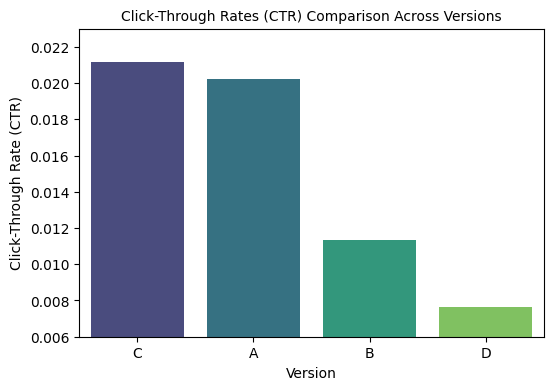

In [50]:
# Data: CTRs for each version
ctrs = pd.DataFrame({
    "Version": ["A", "B", "C", "D"],
    "CTR": [0.020216, 0.011355, 0.021185, 0.007649]
})

# Sorting the CTRs in ascending order
ctrs = ctrs.sort_values("CTR", ascending = False)

# Plotting the CTRs
plt.figure(figsize=(6, 4))
sns.barplot(x="Version", y="CTR", data=ctrs, palette="viridis")

# Adding title and labels
plt.title("Click-Through Rates (CTR) Comparison Across Versions", fontsize=10)
plt.xlabel("Version", fontsize=10)
plt.ylabel("Click-Through Rate (CTR)", fontsize=10)

# Display the plot
plt.ylim(0.006, 0.023)  # Adjust the y-axis limits to focus on differences
plt.show()

But how do we decide who's the winner?
If you feel very brave, read about Post Hoc Tests and find out whether we can declare a clear winner.

In brief: Post hoc tests, also known as post hoc comparisons or pairwise comparisons, are statistical procedures used in conjunction with a Chi-Squared test to determine specific differences between groups or conditions after obtaining significant results from the Chi-Squared test. Once the Chi-Squared test reveals a significant difference among the variables being examined, post hoc tests are employed to identify which specific groups or categories are significantly different from each other.

We have 6 possible dual tests to perform:

Version A - Version B
Version A - Version C
Version A - Version D
Version B - Version C
Version B - Version D
Version C - Version D
The level of alpha we selected for the chi-squared test cannot be same for the dual tests. If there was an error of 5% in each of the tests, this would sum up to much more than the 5% total we set for alpha, so we will need to be much more restrictive in the dual tests. Therefore, we will split the value of alpha equally among the dual tests to be performed.

In [51]:
possible_combinations = 6
alpha_post_hoc = alpha / possible_combinations
alpha_post_hoc

0.008333333333333333

In [52]:
# click-through rates
eniac_a_ctr = eniac_a_clicks / eniac_a_visits
eniac_b_ctr = eniac_b_clicks / eniac_b_visits
eniac_c_ctr = eniac_c_clicks / eniac_c_visits
eniac_d_ctr = eniac_d_clicks / eniac_d_visits

# display as DataFrame
rates = [eniac_a_ctr, eniac_b_ctr, eniac_c_ctr, eniac_d_ctr]
names = ["Version_A", "Version_B", "Version_C", "Version_D"]

ctr_df = pd.DataFrame({"rates": rates, "names": names})
ctr_df.sort_values("rates", ascending=False)

,rates,names
2,0.021185,Version_C
0,0.020216,Version_A
1,0.011355,Version_B
3,0.007649,Version_D


In [53]:
# Calculate CTR for each version
ctr_a = (eniac_a_clicks / eniac_a_visits) * 100
ctr_b = (eniac_b_clicks / eniac_b_visits) * 100
ctr_c = (eniac_c_clicks / eniac_c_visits) * 100
ctr_d = (eniac_d_clicks / eniac_d_visits) * 100

# Create a dictionary with CTR values
ctr_dict = {
    "White SHOP NOW": ctr_a,
    "Red SHOP NOW": ctr_b,
    "White SEE DEALS": ctr_c,
    "Red SEE DEALS": ctr_d
}
winner = max(ctr_dict, key=ctr_dict.get)
print(f"\nThe winning version is '{winner}' with a CTR of {ctr_dict[winner]:.2f}%")


The winning version is 'White SEE DEALS' with a CTR of 2.12%


It appears that the two white buttons have achieved the highest level of success. However, to gain a comprehensive understanding of statistical significance, we will conduct a post hoc test across all versions. Nonetheless, our primary emphasis should be on analysing the discrepancy between the white "SEE DEALS" (C) and the white "SHOP NOW" (A) buttons, as well as the disparity between these two and the remaining versions.

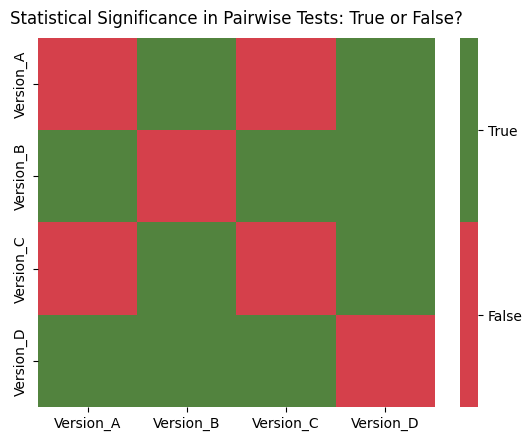

In [56]:
# empty dictionary to fill with our results
stat_significant_dict = {
                        "Version_A": [],
                        "Version_B": [],
                        "Version_C": [],
                        "Version_D": []
                         }

# compare each version to each other version
for i in observed_results.columns:
  for j in observed_results.columns:
    # use scipy to find the p-value of each pair
    chisq, pvalue, df, expected = stats.chi2_contingency(observed_results.loc[:, [i, j]], correction=False)
    # boolean: if the p-value is lower than alpha, our result is statistically significant
    stat_significant_dict[i].append(pvalue < alpha_post_hoc)

# create a DataFrame of results
stat_significant_df = pd.DataFrame(stat_significant_dict,
                                   index=observed_results.columns)

# create a heatmap from the DataFrame & red/green colour palette
red_green_palette = sns.diverging_palette(10, 120, n=2, s=70, l=50)
ax = sns.heatmap(stat_significant_df, cmap=red_green_palette)

# Manually specify colorbar labelling after it's been generated
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['False', 'True'])

# Add a title to the heatmap
ax.set_title("Statistical Significance in Pairwise Tests: True or False?", pad=10);

Analysing our heatmap, it is evident that the version with the highest click-through rate, Version_C, exhibits a statistically significant difference when compared Versions B and D, but not to Version_A, which possesses the second-highest click-through rate. As a result, declaring a clear winner based on post hoc tests becomes challenging, therefore we can only say that both Version_C and Version_A are the winners.

However, if a definitive winner is required, additional steps need to be implemented. This is where we transition from the realm of statistics to the business world. The following actions can help in determining the version to be featured on the website in the future:


*   Consider other metrics alongside click-through rate.
*   Incorporate qualitative research findings.
*   Seek input from subject-matter experts.
*   Redesign the experiment and conduct it once more.

In [59]:
# Adjust alpha level using Bonferroni correction
num_comparisons = len(list(combinations(["A", "B", "C", "D"], 2)))
adjusted_alpha = alpha / num_comparisons
print(f"\nAdjusted alpha level for multiple comparisons: {adjusted_alpha}")


Adjusted alpha level for multiple comparisons: 0.008333333333333333


In [60]:
# Perform pairwise chi-square tests
pairs = list(combinations(["Version_A", "Version_B", "Version_C", "Version_D"], 2))
for pair in pairs:
    subset = observed_results.loc[:, pair]
    chisq, pvalue, df, expected = chi2_contingency(subset)
    print(f"\nPair: {pair}")
    print(f"Chi-Square Statistic: {chisq}")
    print(f"P-value: {pvalue}")
    print(f"Reject Null Hypothesis: {pvalue < adjusted_alpha}")


Pair: ('Version_A', 'Version_B')
Chi-Square Statistic: 62.49362285550828
P-value: 2.6730880539675666e-15
Reject Null Hypothesis: True

Pair: ('Version_A', 'Version_C')
Chi-Square Statistic: 0.5342102943321849
P-value: 0.464842123017306
Reject Null Hypothesis: False

Pair: ('Version_A', 'Version_D')
Chi-Square Statistic: 144.28318375013012
P-value: 3.0808983951735623e-33
Reject Null Hypothesis: True

Pair: ('Version_B', 'Version_C')
Chi-Square Statistic: 74.2291724194565
P-value: 6.955480170773988e-18
Reject Null Hypothesis: True

Pair: ('Version_B', 'Version_D')
Chi-Square Statistic: 17.876339585535256
P-value: 2.3573374085176145e-05
Reject Null Hypothesis: True

Pair: ('Version_C', 'Version_D')
Chi-Square Statistic: 161.1170410120536
P-value: 6.450501398841206e-37
Reject Null Hypothesis: True


Interpretation: Significant Differences:

A vs. C: There is a significant difference between versions A and C.

B vs. C: There is a significant difference between versions B and C.

C vs. D: There is a significant difference between versions C and D.

No Significant Differences:

A vs. B: No significant difference.

A vs. D: No significant difference.

B vs. D: No significant difference.

**Conclusion:**
Version C stands out as the best-performing variant, with statistically significant differences compared to all other versions (A, B, and D). No significant differences were found between A and B, A and D, or B and D.